[Linear algebra on n-dimensional arrays](https://numpy.org/numpy-tutorials/content/tutorial-svd.html)

In [2]:
from scipy import misc
img = misc.face()
print(type(img))


<class 'numpy.ndarray'>


/tmp/ipykernel_180123/2662401302.py:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img = misc.face()


(768, 1024, 3)
3


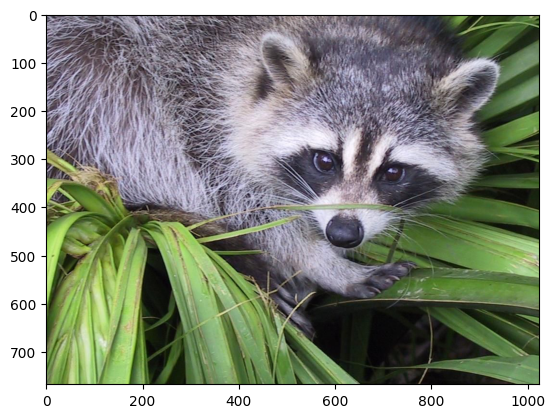

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img)

print(img.shape)
print(img.ndim)

In [4]:
img0 = img[:, :, 0]
print(img0.shape)
print(img0)

(768, 1024)
[[121 138 153 ... 119 131 139]
 [ 89 110 130 ... 118 134 146]
 [ 73  94 115 ... 117 133 144]
 ...
 [ 87  94 107 ... 120 119 119]
 [ 85  95 112 ... 121 120 120]
 [ 85  97 111 ... 120 119 118]]


(768, 1024, 3)
float64
(768, 1024)


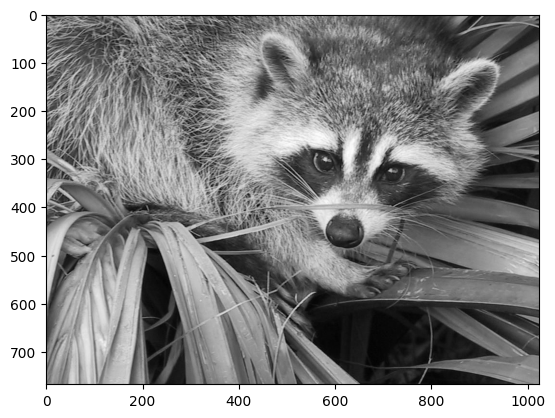

In [5]:
img_array = img / 255
print(img_array.shape)
print(img_array.dtype)

img_gray = img_array @ [0.2126, 0.7152, 0.0722]
print(img_gray.shape)
plt.imshow(img_gray, cmap="gray")


In [12]:
from numpy import linalg
U, s, Vt = linalg.svd(img_gray)
print(U.shape, s.shape, Vt.shape)

import numpy as np
print(np.count_nonzero(s))

s_sum = s.sum()
tops = s[s > 10]
print(tops)
print(tops.size)
percents = [x / s_sum for x in tops]
print(percents)
print(sum(percents))

(768, 768) (768,) (1024, 1024)
768
[410.42098224  85.56090199  63.61066707  45.85114695  41.96884158
  38.25875097  31.65941584  27.22637539  26.52061638  26.10815362
  23.42487722  21.49916197  17.85652873  17.37941645  16.86574464
  16.26735411  15.48694805  14.87815069  14.11500662  13.96559631
  13.70732297  12.75569782  12.12907909  11.97909232  11.38919277
  11.23491655  11.03374003  10.70472619  10.38856926  10.24748813]
30
[0.19376783150342436, 0.04039498748401306, 0.030031849129839475, 0.021647229797237058, 0.019814316945622166, 0.01806271007834831, 0.014947033948382996, 0.012854108214356348, 0.01252090548193118, 0.012326173684191843, 0.011059346034947662, 0.010150177925764906, 0.008430419010206459, 0.008205164899246485, 0.007962650319903246, 0.007680138363318478, 0.007311693285174162, 0.007024268058168744, 0.006663972708150536, 0.006593433157403629, 0.0064714972233997, 0.0060222162419067814, 0.00572637719805734, 0.0056555654863132175, 0.00537706228534248, 0.005304225445956139

(768, 1024)
1.4452998324881597e-12
True


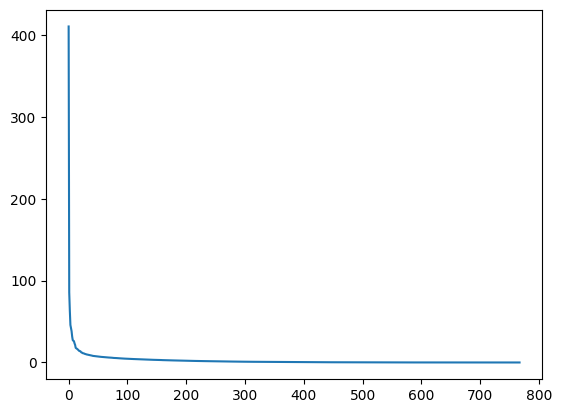

In [19]:
Sigma = np.zeros((U.shape[0], Vt.shape[0]))
np.fill_diagonal(Sigma, s)
prod = U @ Sigma @ Vt
print(prod.shape)

print(linalg.norm(img_gray - prod))
print(np.allclose(img_gray, prod))

plt.plot(s)
plt.show()